# Kelompok 5 J.A.R.V.I.S
Dataset : HR Analytics

Nama Anggota Kelompok 5 :
1. Fikih Imam R.
2. Mim Hanifah P.
3. Mutia Dewi Kurniasih
4. Nadia Putri P.
5. Rizca Zahra
6. Wilmay Armianty Golden Utomo

## Import Libraries List

In [ ]:
#  !pip install scikit-learn==1.0 -U
#  !pip install eli5

In [ ]:
# Put Our Import list
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mtick
import matplotlib.lines as lines
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split as tts, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix,classification_report, roc_auc_score, roc_curve, auc
from lightgbm.sklearn import LGBMClassifier

import six
import sys
sys.modules['sklearn.externals.six'] = six
from imblearn.over_sampling import SVMSMOTE
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.inspection import permutation_importance
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



## <b>Context and Content</b>

Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut ilmuwan data dari orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaan. Banyak orang mendaftar untuk pelatihan perusahaan. Perusahaan ingin mengetahui kandidat mana yang benar-benar ingin bekerja untuk perusahaan setelah pelatihan atau mencari pekerjaan baru karena membantu mengurangi biaya dan waktu serta kualitas pelatihan atau perencanaan kursus dan kategorisasi kandidat. Informasi dari signup dan enrollment pendaftar berupa demografi, pendidikan, dan pengalaman.

Dataset ini dirancang untuk penelitian HR dalam memahami faktor-faktor yang menyebabkan seseorang meninggalkan pekerjaan saat ini. Dengan model yang menggunakan kredensial, demografi, data pengalaman saat ini, dapat diprediksi kemungkinan seorang kandidat untuk mencari pekerjaan baru atau akan bekerja untuk perusahaan, serta menafsirkan faktor-faktor yang memengaruhi keputusan karyawan.

Seluruh data dibagi menjadi data train dan test. Target tidak disertakan dalam data test tetapi data nilai target test ada di file lain. File Sample Submission sesuai dengan enrollee_id dari set tes yang disediakan juga dengan kolom: enrollee _id , target.

<i>Inspiration
- Predict the probability of a candidate will work for the company
- Interpret model(s) such a way that illustrate which features affect candidate decision</i>

## <b>STAGE 1. EDA, INSIGHTS, AND VISUALIZATION</b>

### Get the Dataset + Exploration

In [ ]:
# Code to read csv file into Colaboratory:

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/aug_train.csv')
# test = pd.read_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/aug_test.csv')
# #ss = pd.read_csv('/content/gdrive/MyDrive/J.A.R.V.I.S/Colab and Dataset/sample_submission.csv')

In [ ]:
print('train data :')
display(train)
# print('test data :')
# display(test)
# #print('test answers :')
# #display(ss)

train data :


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


#### Features in Given Data set

1. enrollee_id: Unique ID for candidate

2. city: City code

3. city_ development _index : Developement index of the city (scaled)

4. gender: Gender of candidate

5. relevent_experience: Relevant experience of candidate

6. enrolled_university: Type of University course enrolled if any

7. education_level: Education level of candidate

8. major_discipline : Education major discipline of candidate

9. experience: Candidate total experience in years

10. company_size: No of employees in current employer's company

11. company_type : Type of current employer

12. lastnewjob: Difference in years between previous job and current job

13. training_hours: training hours completed

14. target: 0 – Not looking for job change, 1 – Looking for a job change

Data di sini terkait dengan HR analytics suatu perusahaan, untuk memperkirakan kandidat yang mencari perubahan pekerjaan, dan faktor-faktor yang mempengaruhinya.

Poin kunci utama yang perlu diperhatikan dalam dataset ini:

1. Sebagian besar data bersifat kategoris
2. Handling imbalance data
3. Ada / tidak missing values

#### About Train Data

##### Descriptive Statistics

In [ ]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*80)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*80)
    print(dataframe.info())
    print('*'*80)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*80)
    print(dataframe.describe().T)
    print('*'*80)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*80)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*80)
    print("MISSING VALUES")
    print('*'*80)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*80)
    print("MISSING VALUES IN %")
    print('*'*80)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*80)
    
data_explore(train)

DATA EXPLORATION
********************************************************************************
Shape of dataset :  (19158, 14)
********************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null 

##### Value Counting

Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [ ]:
nums = ['enrollee_id','city_development_index', 'training_hours', 'target']
cats = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(train[col].value_counts())
    print()

Value count kolom city:
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: city, Length: 123, dtype: int64

Value count kolom gender:
Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

Value count kolom relevent_experience:
Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Value count kolom enrolled_university:
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

Value count kolom education_level:
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

Value count kolom major_discipline:
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts            

Kesimpulan tentang train data :

A. Pengamatan info:
1. Data terdiri dari 19158 baris
2. Tampak beberapa kolom masih memiliki null/missing values (Non-Null Count < jumlah baris) seperti: `gender` (23.53%), `enrolled_university`(2.01%), `education_level` (2,40%), `major_discipline` (14.68%), `experience` (0.34%), `company_size` (30.99%), `company_type` (32.05%), dan `last_new_job` (2.21%)
3. Sepertinya terdapat kolom yang bisa ditindak lanjut : `experience`, `company_size`, dan `last_new_job`

B. Pengamatan describe:
1. Tidak ada issue pada nilai minimal dan maksimal untuk semua kolom
2. Kolom `city_development_index` tampaknya skew ke kiri (long-left tail)
3. Kolom `training_hours` tampaknya skew ke kanan (long-right tail)
4. Data dinominasi (proporsi lebih dari 50% dari jumlah baris data) oleh kaum laki-laki (`gener`), berpengalaman (`relevent_experience`), no enrollment(`enrolled_university`), graduate(`eduction level`), dan STEM(`major_discipline`) 
5. Kolom `city` dan `experience` memiliki kardinalitas (jumlah unique values) yang cukup tinggi (123 dan 22)

#### About Test Data

##### Descriptive Statistics

In [ ]:
# def data_explore(dataframe):
#     print("DATA EXPLORATION")
#     print('*'*80)
#     print("Shape of dataset : ",dataframe.shape)
#     print('*'*80)
#     print(dataframe.info())
#     print('*'*80)
#     print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
#     print('*'*80)
#     print(dataframe.describe().T)
#     print('*'*80)
#     print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
#     print('*'*80)
#     print(dataframe.describe(exclude = ['float', 'int64']).T)
#     print('*'*80)
#     print("MISSING VALUES")
#     print('*'*80)
#     print(dataframe.isna().sum().sort_values(ascending=False))
#     print('*'*80)
#     print("MISSING VALUES IN %")
#     print('*'*80)
#     print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
#     print('*'*80)
    
# data_explore(test)

##### Value Counting

Kita dapat memastikan pengamatan mengenai kolom-kolom categorical di atas dengan value counting

In [ ]:
# nums = ['enrollee_id','city_development_index', 'training_hours', 'target']
# cats = ['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']
# for col in cats:
#     print(f'''Value count kolom {col}:''')
#     print(test[col].value_counts())
#     print()

Kesimpulan tentang test data:

#### About Test Answers

In [ ]:
# Check info
#ss.info()

In [ ]:
# Check total number of Null Data
#ss.isna().sum()

In [ ]:
# Check describe
# ss.describe()

### Exploratory Data Analysis

##### Univariate Analysis

Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

###### Numerical

**Boxplot**

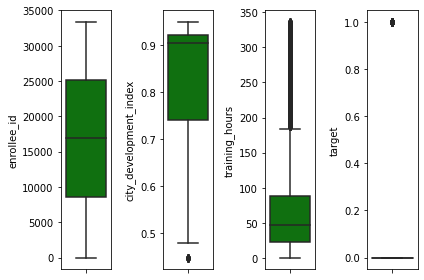

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=train[features[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Pengamatan:**

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier yang sangat tipis pada kolom `city_development_index`
* Dari boxplotnya juga tampak mana distribusi yang terlihat *skewed*: `city_development_index` (kiri) dan `training_hours` (kanan)
* Diketahui kolom target bertipe boolean

**Dist Plot**

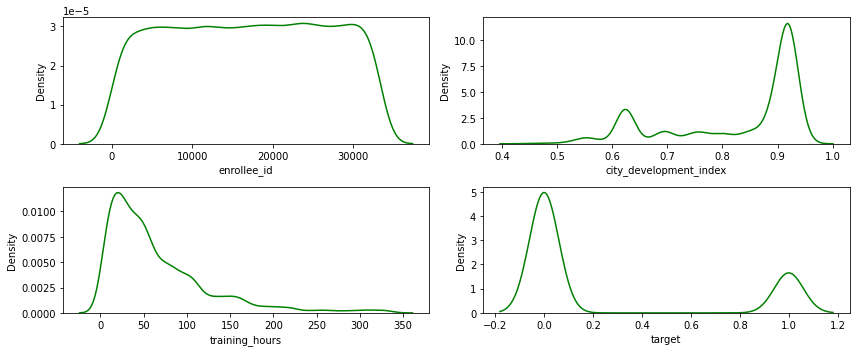

In [ ]:
features = nums
plt.figure(figsize=(12, 5))
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=train[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

**Violin Plots**

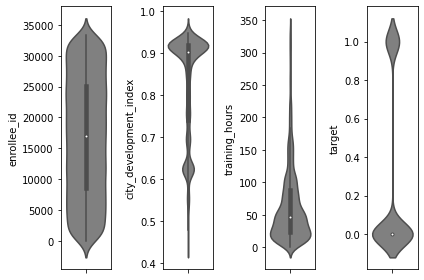

In [ ]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=train[features[i]], color='gray', orient='v')
    plt.tight_layout()

**Hasil Pengamatan:**

Untuk distribution plot, hal utama yang perlu diperhatikan adalah bentuk distribusi:
* Seperti dugaan kita ketika melihat boxplot dan violin di atas, kedua kolom *skewed* (`city_development_index` (skewed kiri) dan `training_hours` (skewed kanan))
* Berarti ada kemungkinan kita perlu melakukan sesuatu pada kedua kolom tersebut nantinya

###### Categorical

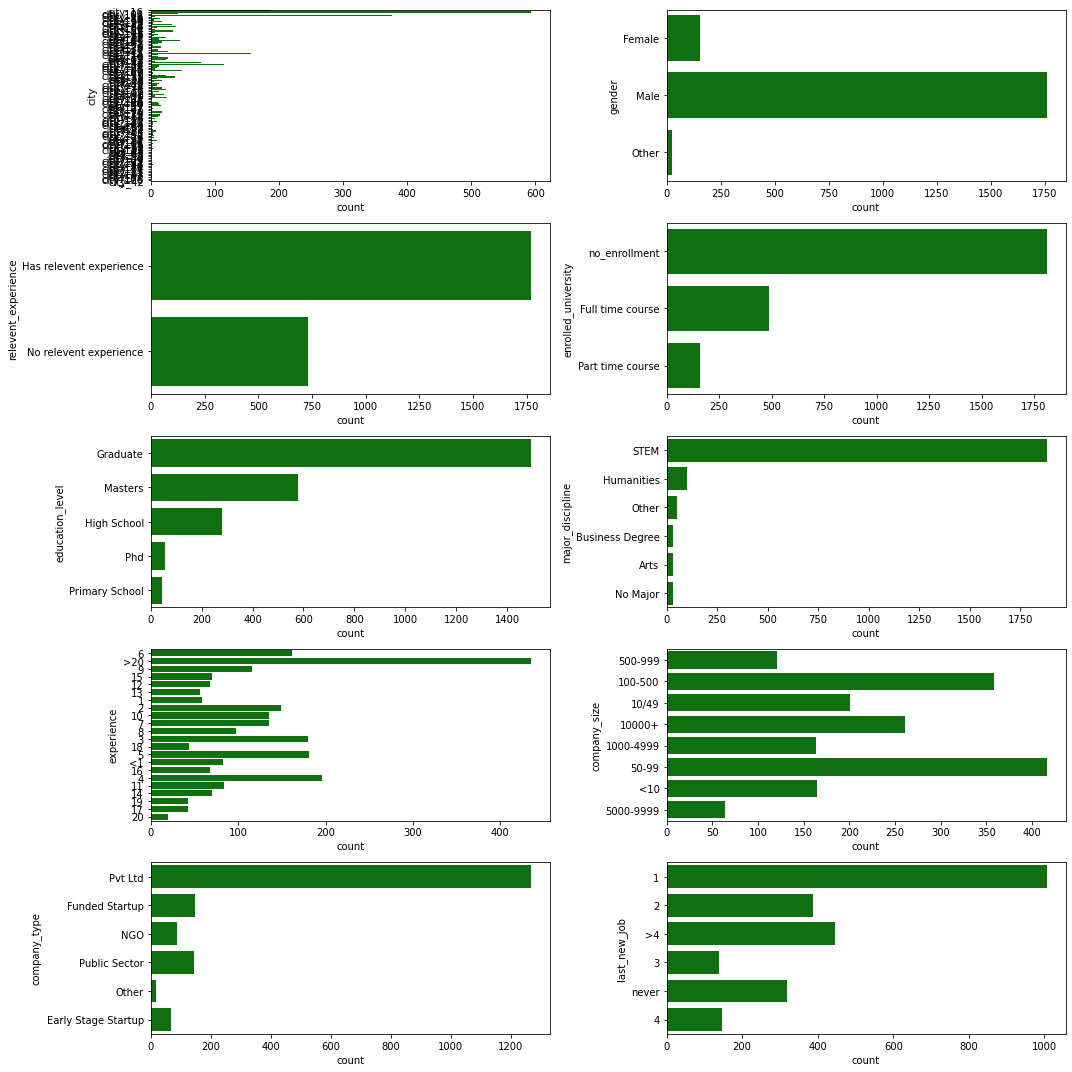

In [ ]:
train_sample = train.sample(2500, random_state=42)
plt.figure(figsize=(15,15))
for i in range(0, len(cats)):
    plt.subplot(5, 2, i+1)
    sns.countplot(y = train_sample[cats[i]], color='green', orient='v')
    plt.tight_layout()

**Hasil Pengamatan:**

1. kolom (`enrollee_id`) merupakan primary keys sehingga distribusi plot sangat luas dan dapat kita lakukan drop untuk kolom ini <br>
2. kolom (`target`) merupakan data boelan dan imbalance <br>
3. Kandidat didominasi oleh Male (`Gender`), STEM (`major_dicipline`) dan Pvt Ltd (`company_size`) <br>
4. kolom (`city_development_index`) memiliki distribusi yang skew ke kiri sedangkan kolom (`training_hours`) memiliki distribusi skew yang extrem ke kanan

#### Multivariate Analysis

##### Numerical

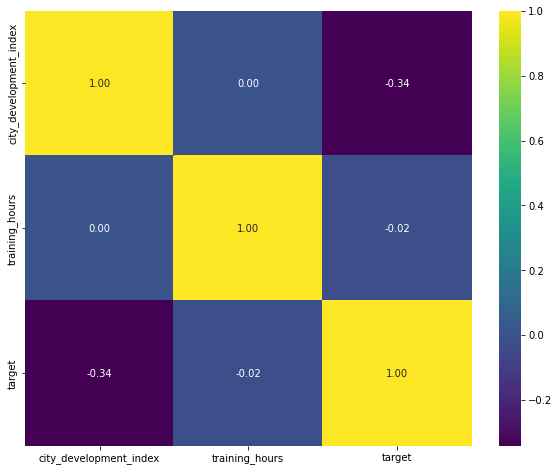

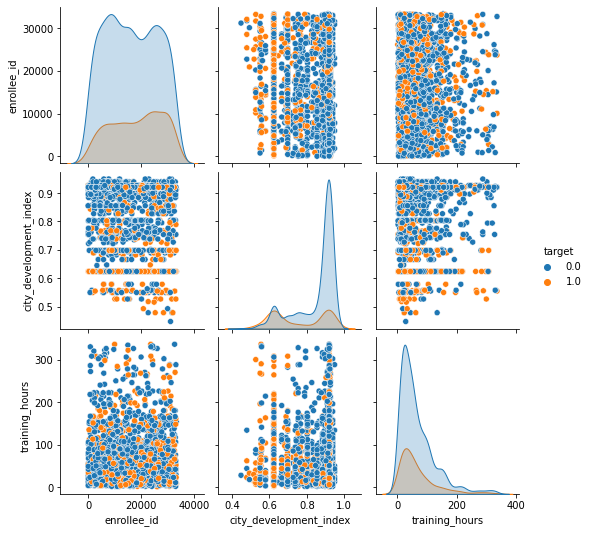

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.drop('enrollee_id', axis=1).corr(), cmap='viridis', annot=True, fmt='.2f')
sns.pairplot(train_sample, diag_kind ='kde', hue='target');

**Hasil Pengamatan**

1. Berdasarkan heatmap plot, `trainning hours` tidak memiliki impact yang sangat signifikan terhadap target <br>
2. `City_development_index` berkorelasi negatif terhadap nilai targetnya dan memiliki nilai korelasi lemah dengan target <br>
3. Dari pairplot, terlihat bahwa persebaran target yang searching for new job cukup merata

**1. Bagaimana pengaruh City Development Index ketika seseorang memutuskan mencari pekerjaan baru?**

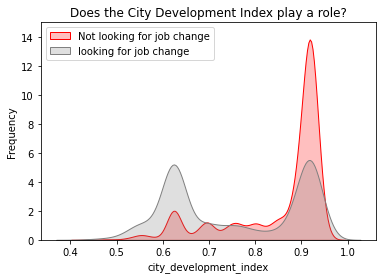

In [ ]:
g = sns.kdeplot(train['city_development_index'][(train["target"] == 0) & (train['city_development_index'].notnull())], color="Red", shade = True)
g = sns.kdeplot(train['city_development_index'][(train["target"] == 1) & (train['city_development_index'].notnull())], ax =g, color="Grey", shade= True)
g.set_xlabel('city_development_index')
g.set_ylabel("Frequency")
g.set_title('Does the City Development Index play a role?')
plt.ylim(0, 15)
g = g.legend(["Not looking for job change","looking for job change"], loc='upper left')

Pengamatan :
1. Kandidat dengan CDI rendah (0,66) cenderung memiliki keinginan untuk mencari pekerjaan baru
2. Kandidat dengan CDI tinggi (0.9) cenderung sangat tidak tertarik mencari pekerjaan baru.

**2. Bagaimana pengaruh Training Hours dengan keinginan seseorang untuk mencari pekerjaan baru?**

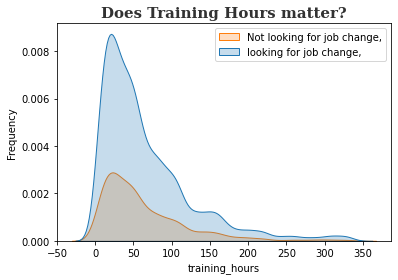

In [ ]:
g = sns.kdeplot(train['training_hours'], hue='target',data=train, color="Red", shade = True)
g.set_xlabel('training_hours')
g.set_ylabel("Frequency")
g.legend(["Not looking for job change,","looking for job change,"])
g.set_title('Does Training Hours matter?', fontsize=15, fontweight='bold', fontfamily='serif', color="#323232");

Pengamatan :
1. Kandidat dengan training hours kurang lebih 20 jam memiliki kecenderungan untuk mencari pekerjaan baru
2. Dapat dilihat jumlah waktu course yang diikuti kandidat adalah sekitar 46-48 jam.
3. Semakin banyak jumlah training hours maka semakin sedikit kecenderungan untuk mencari pekerjaan baru 

##### Categorical

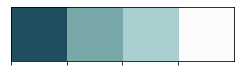

In [ ]:
blueis = ['#1F4E5F','#79A8A9','#AACFD0','#fbfbfb']
sns.set_palette(blueis)
sns.palplot(sns.color_palette())

jumlah target 1 =  4777  orang


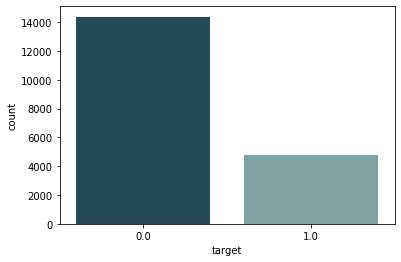

In [ ]:
print('jumlah target 1 = ', train[train['target']==1].target.count(), ' orang')
sns.countplot(x=train['target'], palette=blueis);

In [ ]:
train[train['target']==1]['last_new_job'].value_counts()

1        2125
never     739
2         700
>4        600
3         231
4         228
Name: last_new_job, dtype: int64

[10209, 912, 141]
[3012, 326, 50]


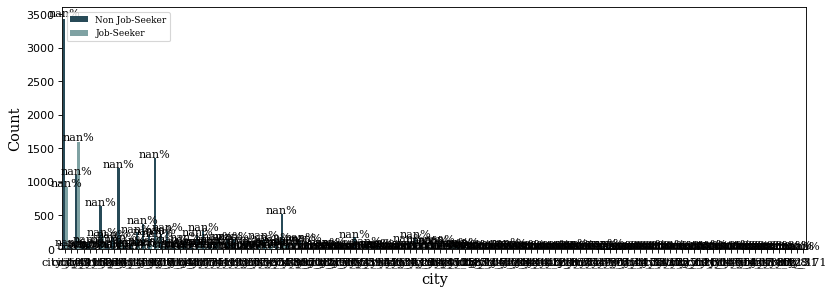

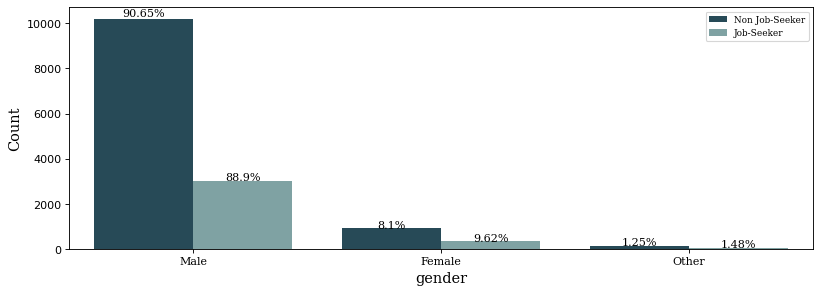

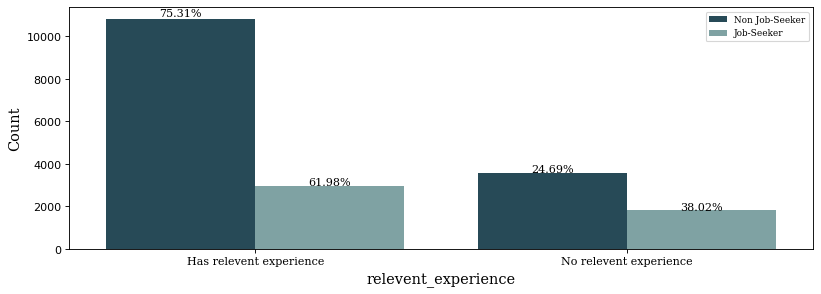

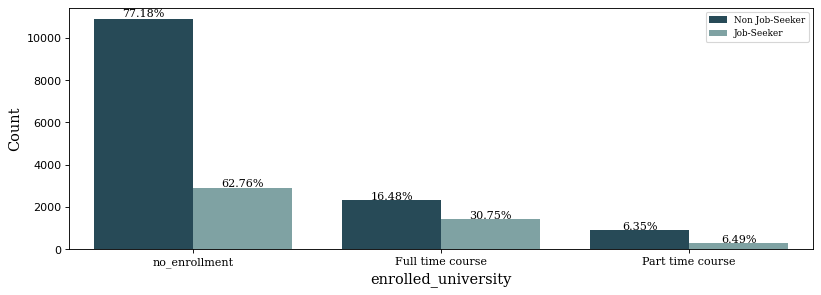

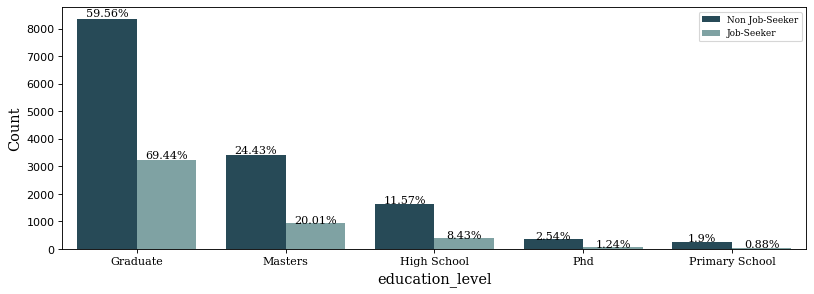

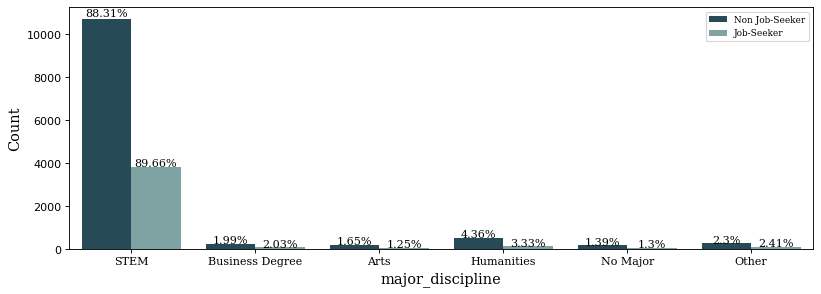

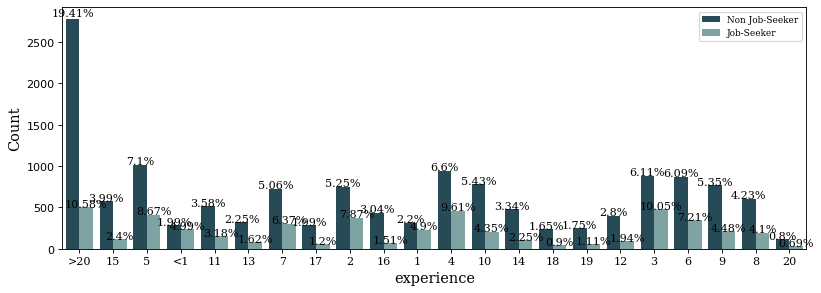

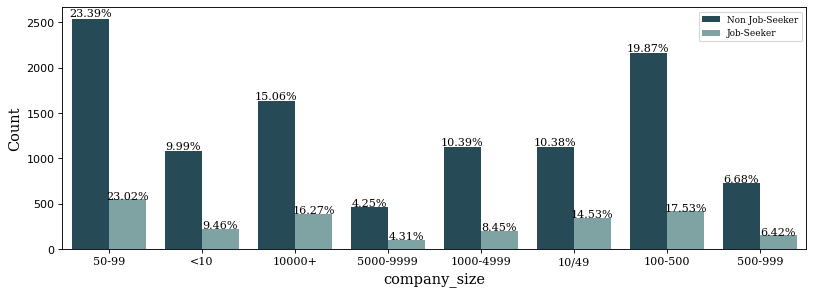

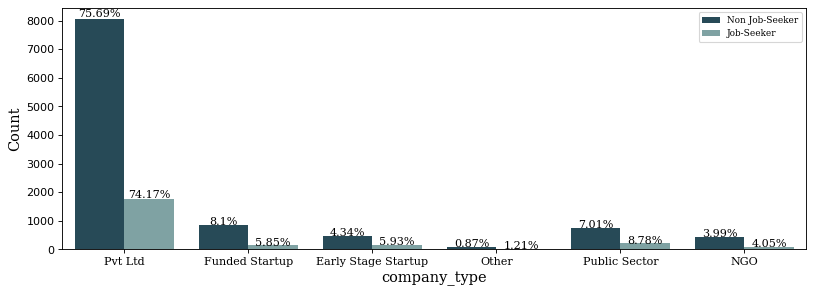

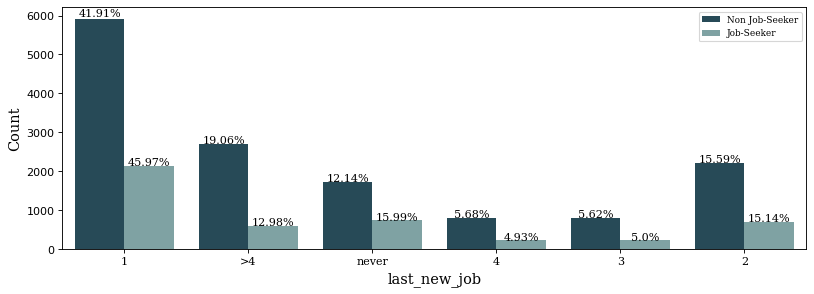

In [ ]:
values = {}
lists =[]
for col in cats:
    plt.figure(figsize=(12,4), dpi =80)
    ax = sns.countplot(data=train,x=col, palette=sns.color_palette(),hue = 'target')
    plt.xlabel(col, family='serif', fontsize=13)
    plt.xticks(family='serif')
    plt.ylabel('Count', family='serif', fontsize=13)
    plt.xticks(family='serif')
    plt.legend(('Non Job-Seeker', 'Job-Seeker'), prop={'family': 'serif', 'size': 8})
    a = list()
    b = list()
    numbers = 0
    n = len(ax.patches)
    for p in ax.patches:
        if numbers < n/2: a.append(p.get_height())
        else: b.append(p.get_height())
        numbers += 1
    if col == 'gender':
        print(a)
        print(b)
    a = sum(a)
    b = sum(b)
    numbers = 0
    for p in ax.patches:
        if numbers < n/2: h = round(100*p.get_height()/a,2)
        else: h = round(100*p.get_height()/b,2)
        height=str(h)+'%'
        background_color= '#fbfbfb'
        ax.annotate(height, (p.get_x()+p.get_width()/2, p.get_height()*1.01), ha='center',fontfamily='serif', fontsize= 10)
        lists.append(p.get_height())
        numbers += 1
    values[col]=lists
    lists=[]

**Kesimpulan:**

Dari hasil multivariate analysis, terlihat bahwa presentase yang tidak mencari pekerjaan (target=0) lebih banyak dibandingkan dengan yang mencari pekerjaan (target=1) disetiap featurenya

### Insights and Visualization

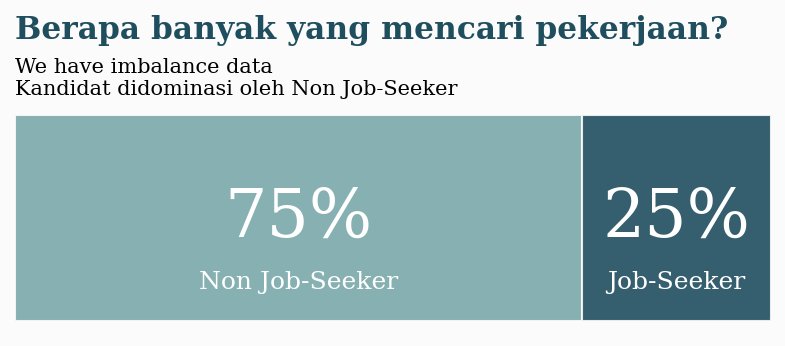

In [ ]:
x=train.groupby(['target'])['target'].count()
y=len(train)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = '#fbfbfb'
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[0.0], color='#79A8A9', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[1.0], left=ratio[0.0], color='#1F4E5F', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[0.0][i]+ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[0.0][i]+ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')

 
fig.text(0.125,1.1,'Berapa banyak yang mencari pekerjaan?', fontfamily='serif',fontsize=15, fontweight='bold', color='#1F4E5F')
fig.text(0.125,0.915,'We have imbalance data\nKandidat didominasi oleh Non Job-Seeker',fontfamily='serif',fontsize=10)  

# fig1 = plt.gcf()
# plt.savefig('job-seeker%.png', bbox_inches='tight',dpi=500)

plt.show()

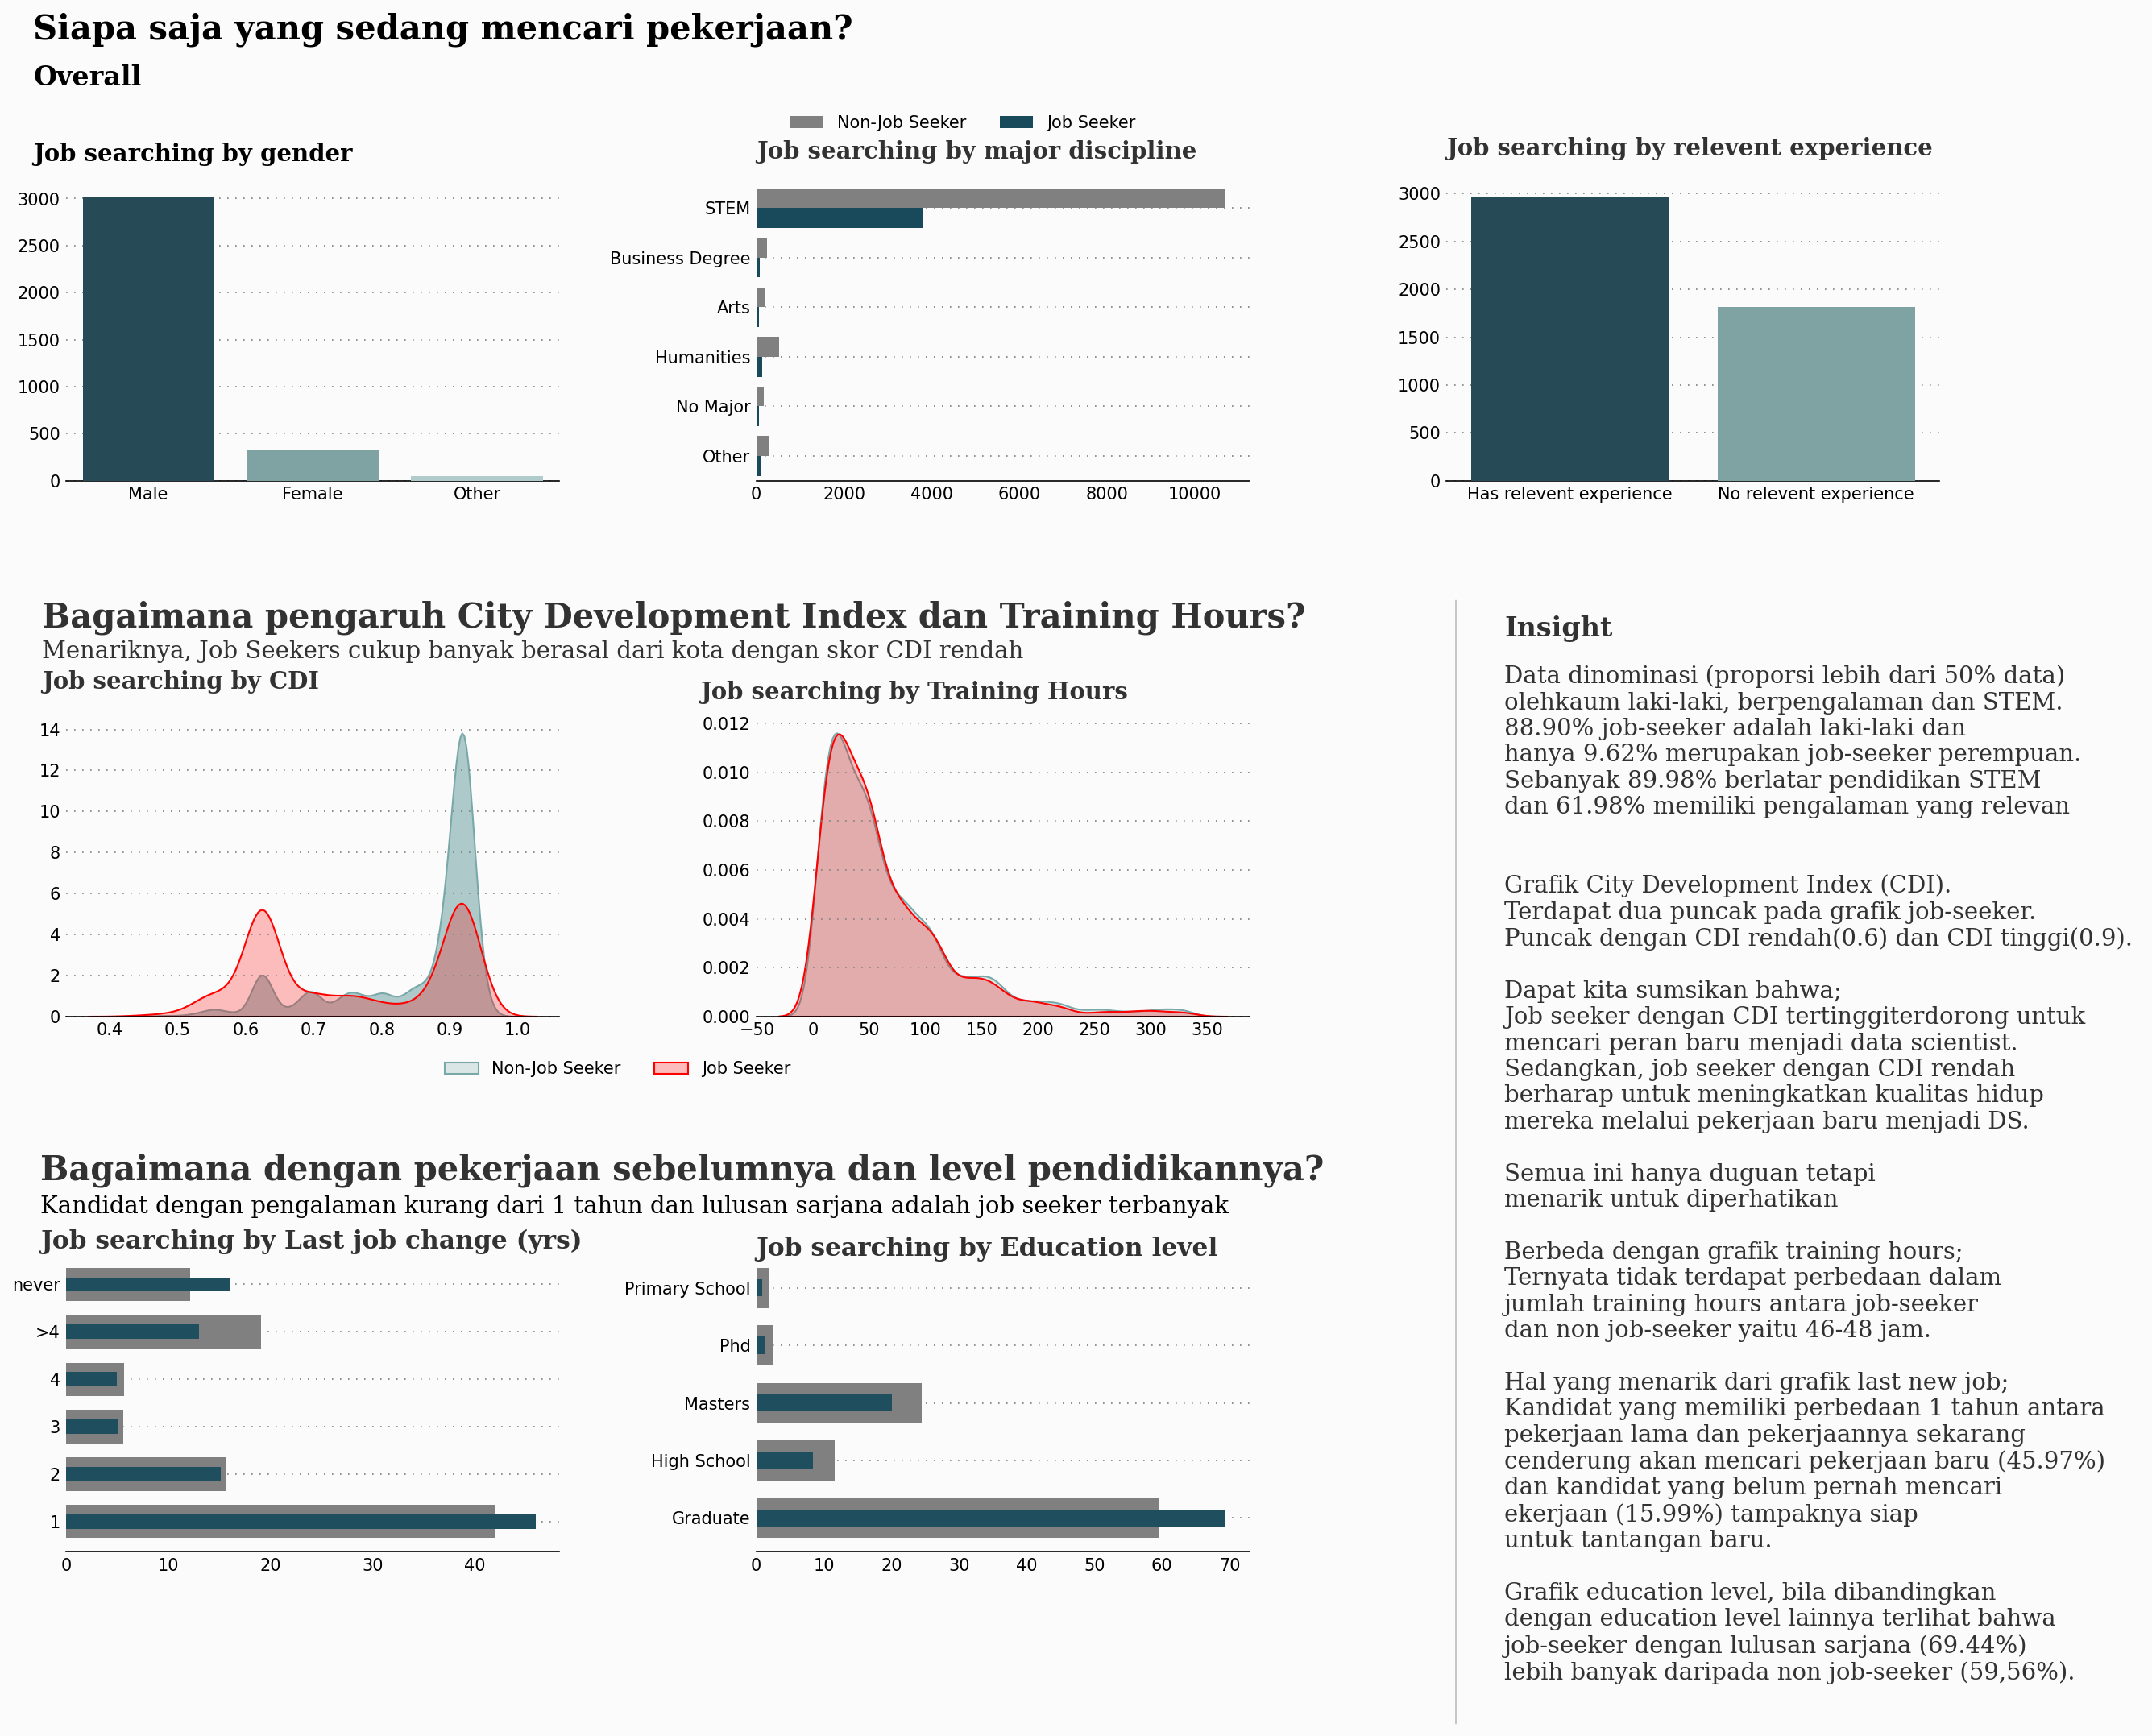

In [ ]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(20,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.8)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])
ax6 = fig.add_subplot(gs[0, 2])

# Gender
ax0.text(-0.7, 4700, 'Siapa saja yang sedang mencari pekerjaan?', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-0.7, 4200, 'Overall', fontsize=16, fontweight='bold', fontfamily='serif')
ax0.text(-0.7, 3400, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif')
sns.countplot(x="gender", data=train[train['target']==1], palette=blueis, ax=ax0, zorder=3)

# Major Discipline
ax1.text(-1, -1, 'Job searching by major discipline', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(y="major_discipline",hue='target', data=train, orient='v', palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(0.8, 1.28), facecolor=background_color, edgecolor=background_color)

#Relevant Experience
ax6.text(-0.5, 3400, 'Job searching by relevent experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="relevent_experience", data=train[train['target']==1], palette=blueis, ax=ax6, zorder=3)

# CDI
ax2.text(0.3, 19, 'Bagaimana pengaruh City Development Index dan Training Hours?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 17.5, 'Menariknya, Job Seekers cukup banyak berasal dari kota dengan skor CDI rendah', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 16, 'Job searching by CDI', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train.loc[(train["target"]==0), "city_development_index"], color='#79A8A9', shade = True, alpha= 0.6,label="Not Survived", ax=ax2)
sns.kdeplot(train.loc[(train["target"]==1), "city_development_index"], color="Red", shade = True, label="Survived", ax=ax2)

#Training Hours
ax3.text(-100, 0.013, 'Job searching by Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train.loc[(train["target"]==0), "training_hours"], color="#79A8A9",shade= True, label="Not Survived", ax=ax3)
sns.kdeplot(train.loc[(train["target"]==1), "training_hours"], color="red", shade= True, label="Survived", ax=ax3)
legend_labels, _= ax3.get_legend_handles_labels()
ax3.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(0.1, -0.1), facecolor=background_color, edgecolor=background_color)


###
train['count'] = 1
job_hunt_only = train[train['target']==1]
no_job_hunt_only = train[train['target']==0]

job_change = train.groupby(['education_level','last_new_job'])['experience'].sum().unstack()

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###
ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#1F4E5F", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#1F4E5F", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-2.5, 5.75, 'Job searching by Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Job searching by Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.2, 'Bagaimana dengan pekerjaan sebelumnya dan level pendidikannya?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.5, 
         'Kandidat dengan pengalaman kurang dari 1 tahun dan lulusan sarjana adalah job seeker terbanyak', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.72, 0.63
         , 'Insight', fontsize=16, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.72, 0.04, '''
Data dinominasi (proporsi lebih dari 50% data) 
olehkaum laki-laki, berpengalaman dan STEM.
88.90% job-seeker adalah laki-laki dan
hanya 9.62% merupakan job-seeker perempuan.
Sebanyak 89.98% berlatar pendidikan STEM 
dan 61.98% memiliki pengalaman yang relevan


Grafik City Development Index (CDI).
Terdapat dua puncak pada grafik job-seeker. 
Puncak dengan CDI rendah(0.6) dan CDI tinggi(0.9). 

Dapat kita sumsikan bahwa;
Job seeker dengan CDI tertinggiterdorong untuk 
mencari peran baru menjadi data scientist.
Sedangkan, job seeker dengan CDI rendah
berharap untuk meningkatkan kualitas hidup
mereka melalui pekerjaan baru menjadi DS.

Semua ini hanya duguan tetapi 
menarik untuk diperhatikan

Berbeda dengan grafik training hours;
Ternyata tidak terdapat perbedaan dalam 
jumlah training hours antara job-seeker
dan non job-seeker yaitu 46-48 jam.

Hal yang menarik dari grafik last new job;
Kandidat yang memiliki perbedaan 1 tahun antara 
pekerjaan lama dan pekerjaannya sekarang 
cenderung akan mencari pekerjaan baru (45.97%) 
dan kandidat yang belum pernah mencari 
ekerjaan (15.99%) tampaknya siap 
untuk tantangan baru.

Grafik education level, bila dibandingkan
dengan education level lainnya terlihat bahwa 
job-seeker dengan lulusan sarjana (69.44%) 
lebih banyak daripada non job-seeker (59,56%).
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



l1 = lines.Line2D([0.7, 0.7], [0.03, 0.65], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,7):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,7):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,7):
    for y in range(0,7):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

# fig1 = plt.gcf()

# plt.savefig('insight.png', bbox_inches='tight', dpi=1500)
plt.show();

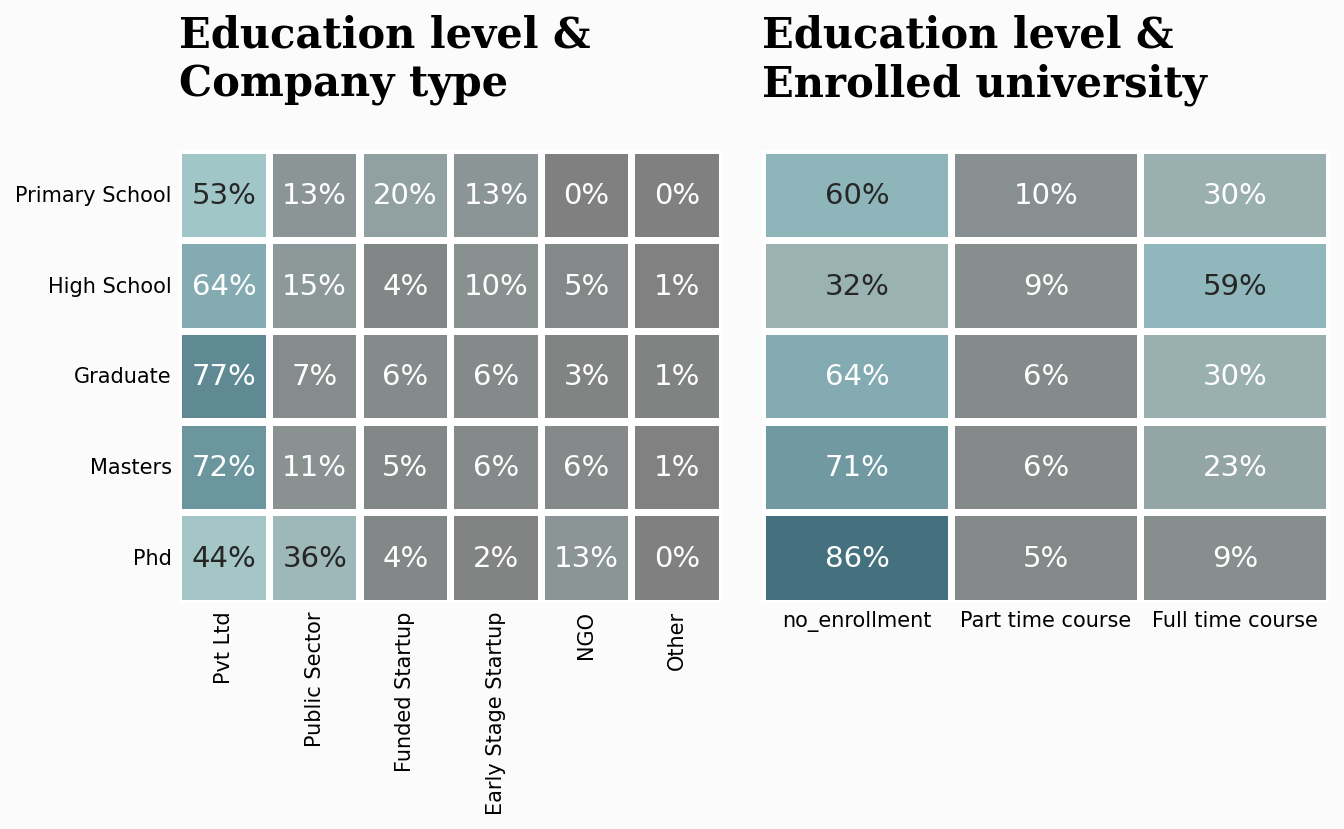

In [ ]:
# ed_order = ['Primary School','High School','Graduate','Masters','Phd']
# company_order = ['Pvt Ltd','Public Sector','Funded Startup','Early Stage Startup','NGO','Other']
# enrolled_order = ['no_enrollment', 'Part time course', 'Full time course']

# job_hunt_only = train[train['target']==1]

# job_seek_company = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]
# job_seek_enrolled = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['enrolled_university'], normalize='index').loc[ed_order,enrolled_order]

# fig = plt.figure(figsize=(10,4),dpi=150)
# fig.patch.set_facecolor(background_color)

# gs = fig.add_gridspec(1, 2)
# gs.update(wspace=0.05, hspace=0.1)
# ax0 = fig.add_subplot(gs[0,0])
# ax1 = fig.add_subplot(gs[0,1])


# colors = ['gray', '#AACFD0', '#1F4E5F']
# colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# sns.heatmap(ax=ax0, data=job_seek_company, linewidths=.1, vmin=-0, vmax=1,
#            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

# sns.heatmap(ax=ax1, data=job_seek_enrolled, linewidths=.1, vmin=-0, vmax=1, cbar_kws={"orientation": "horizontal"},
#            cbar=False, cmap=colormap,yticklabels=False,linewidth=3,annot=True, fmt='1.0%',annot_kws={"fontsize":14})


# ax0.set_facecolor(background_color)
# ax1.set_facecolor(background_color) 
# ax0.set_xlabel("")
# ax0.set_ylabel("")

# for s in ["top","right","left"]:
#     ax0.spines[s].set_visible(False)


# ax1.set_xlabel("")
# ax1.set_ylabel("")

# for s in ["top","right","left"]:
#     ax0.spines[s].set_visible(False)
#     ax1.spines[s].set_visible(False)
    
    
# ax0.text(0, -0.6, 
#          'Education level &\nCompany type', 
#          fontsize=20, 
#          fontweight='bold', 
#          fontfamily='serif',
#         )

# ax0.text(0, -0.08, 
#          '    ', 
#          fontsize=13, 
#          fontweight='light', 
#          fontfamily='serif',
#         )


###

# ax1.text(0, -0.6, 
#          'Education level &\nEnrolled university', 
#          fontsize=20, 
#          fontweight='bold', 
#          fontfamily='serif',
#         )
# ax1.text(0, -0.2, 
#          '    ', 
#          fontsize=13, 
#          fontweight='light', 
#          fontfamily='serif',
#         )
    

# ax0.tick_params(axis=u'both', which=u'both',length=0)
# ax1.tick_params(axis=u'both', which=u'both',length=0)

# plt.show()


Dari EDA di atas, didapatkan beberapa bussiness insight :

1. City Development Index : 
      1. Kandidat dengan CDI rendah (0,66) cenderung memiliki keinginan untuk mencari pekerjaan baru
      2. Kandidat dengan CDI tinggi (0.9) cenderung sangat tidak tertarik mencari pekerjaan baru.


2. Training Hours :
     1. Kandidat dengan training hours kurang lebih 20 jam memiliki kecenderungan untuk mencari pekerjaan baru
     2. Dapat dilihat jumlah waktu course yang diikuti kandidat adalah sekitar 46-48 jam.
     3. Semakin banyak jumlah training hours maka semakin sedikit kecenderungan untuk mencari pekerjaan baru 
      
      
3. Gender :
      1. 88.9% kandidat laki-laki cenderung mencari pekerjaan baru.
      2. Hanya 9.62% kandidat perempuan yang cenderung akan mencari pekerjaan baru.


4. Company Type : 
      * Kandidat dari Company Type Pvt Ltd paling banyak ingin mencari pekerjaan baru, yaitu sebesar 74.17%.


5. Education Level :
      * Kandidat dengan education level graduate paling banyak mencari pekerjaan baru yaitu sebesar 69.44%   


6. Major Discipline :
      * Kandidat dengan Major discipline STEM (Science Technology Engineering Math) paling banyak mencari pekerjaan baru yaitu sebesar 89.66%.


7. Relevant Experience :
      1. 61.98% kandidat dengan relevant experience cenderung akan mencari pekerjaan baru. 
      2. 38.02% kandidat dengan non-relevant experience cenderung akan mencari pekerjaan baru.

 
8. Experience - kandidat yang cenderung akan mencari pekerjaan baru adalah kandidat dengan total experience:
      1. Di atas 20 tahun experience (10.58%)
      2. 3 tahun experience(9.61%)
      3. 4 tahun experience(10.05%)


9. Last New Job :
    * Kandidat yang memiliki perbedaan 1 tahun antara pekerjaan lama dan pekerjaannya sekarang cenderung akan mencari pekerjaan baru (45.97%)

## <b>STAGE 2. DATA PREPROCESSING</b>

### Data Cleansing
1. Handle missing values
2. Handle duplicated data
3. Handle outliers
4. Feature transformation w
5. Feature encoding
6. Handle class imbalance w

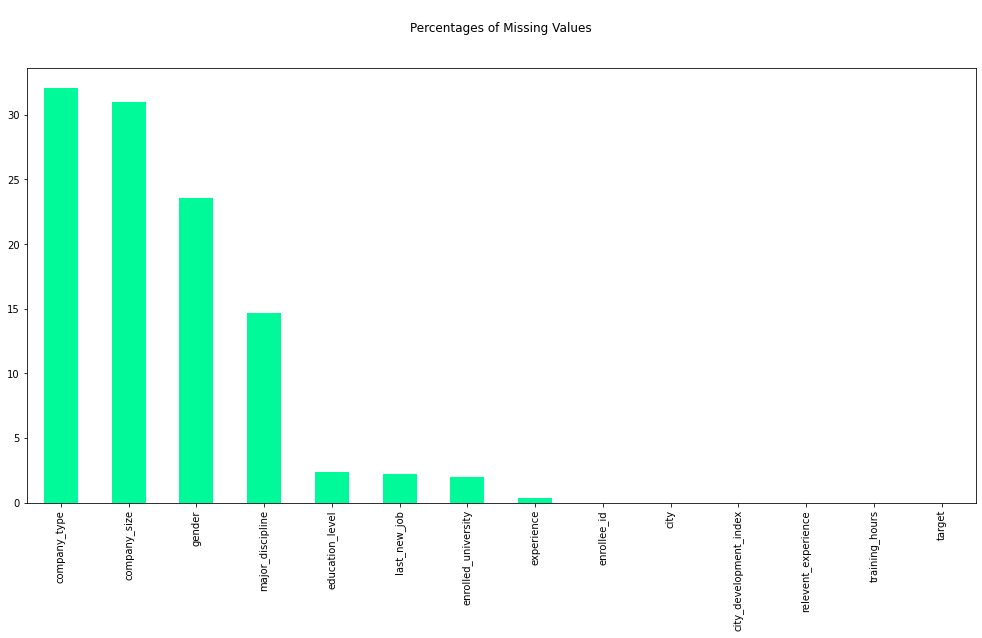

In [ ]:
missing = 100 * train.isna().sum().sort_values(ascending=False) / train.shape[0]
missing.plot(kind='bar', color="mediumspringgreen", figsize=(17,8))
plt.title("\nPercentages of Missing Values\n\n")
plt.show()

In [ ]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


#### Handle Duplicated Data

Pada tahap ini dilakukan pengecekan dan drop baris apabila terdapat data yang terduplikasi.



In [ ]:
dfc = train.copy()
# Drop duplicated rows
print(f'Jumlah row duplicated sebelum dihapus: {dfc.duplicated().sum()}')
dfc.drop_duplicates(inplace=True)
print(f'Jumlah row duplicated SETELAH dihapus: {dfc.duplicated().sum()}')

dfc.drop(['enrollee_id','training_hours'], 1, inplace=True)
dfc.shape

Jumlah row duplicated sebelum dihapus: 0
Jumlah row duplicated SETELAH dihapus: 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


(19158, 12)

Feature `training_hours` perlu di drop karena berdasarkan heatmap plot pada tahap EDA sebelumnya, feature ini memiliki korelasi yang sangat kecil dengan kolom `target`.


#### Feature Encoding

Untuk mempermudah proses pemodelan, maka value data perlu diubah menjadi numerik dengan metode Label Encoder.

In [ ]:
dfc['company_size'] = dfc['company_size'].replace(10/49, '10-49')

from sklearn.preprocessing import LabelEncoder
to_LabelEncode = dfc[['city','gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job']]

le = LabelEncoder()
dfc_temp = to_LabelEncode.astype("str").apply(le.fit_transform)
display(dfc_temp)
# I don't want NaN values is categorized as a new label
dfc_final = dfc_temp.where(~to_LabelEncode.isna(), to_LabelEncode)
display(dfc_final)

dff = dfc.copy()
dff = dff.drop(['city','gender', 'relevent_experience','enrolled_university', 'education_level',
                'major_discipline','experience', 'company_size', 'company_type', 'last_new_job'], axis = 1)
dff = dfc_final.join(dff)
display(dff)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,5,1,0,3,0,5,21,8,6,0
1,77,1,1,3,0,5,6,4,5,4
2,64,3,1,0,0,5,15,8,6,6
3,14,3,1,2,0,1,20,8,5,6
4,50,1,0,3,2,5,21,4,1,3
...,...,...,...,...,...,...,...,...,...,...
19153,55,1,1,3,0,2,5,8,6,0
19154,5,1,0,3,0,5,5,8,6,3
19155,5,1,0,3,0,5,21,4,5,3
19156,94,1,0,3,1,6,20,5,5,1


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,5,1,0,3,0,5,21,NaN,NaN,0
1,77,1,1,3,0,5,6,4,5,4
2,64,NaN,1,0,0,5,15,NaN,NaN,6
3,14,NaN,1,NaN,0,1,20,NaN,5,6
4,50,1,0,3,2,5,21,4,1,3
...,...,...,...,...,...,...,...,...,...,...
19153,55,1,1,3,0,2,5,NaN,NaN,0
19154,5,1,0,3,0,5,5,NaN,NaN,3
19155,5,1,0,3,0,5,21,4,5,3
19156,94,1,0,3,1,NaN,20,5,5,1


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,target
0,5,1,0,3,0,5,21,NaN,NaN,0,0.920,1.0
1,77,1,1,3,0,5,6,4,5,4,0.776,0.0
2,64,NaN,1,0,0,5,15,NaN,NaN,6,0.624,0.0
3,14,NaN,1,NaN,0,1,20,NaN,5,6,0.789,1.0
4,50,1,0,3,2,5,21,4,1,3,0.767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55,1,1,3,0,2,5,NaN,NaN,0,0.878,1.0
19154,5,1,0,3,0,5,5,NaN,NaN,3,0.920,1.0
19155,5,1,0,3,0,5,21,4,5,3,0.920,0.0
19156,94,1,0,3,1,NaN,20,5,5,1,0.802,0.0


#### Handle Missing Values
Handle missing values in the dataset:
- Deleting Rows with missing values
> Pros:<br>
A model trained with the removal of all missing values creates a robust model.<br>
Cons:<br>
Loss of a lot of information.
Works poorly if the percentage of missing values is excessive in comparison to the complete dataset.
- Impute missing values for continuous variable (Mean/Median)
> Pros:<BR>
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.<Br>
Cons:<Br>
Works only with numerical continuous variables.
Can cause data leakage.
Do not factor the covariance between features.<br>
- Impute missing values for categorical variable (Modus)
> Pros:<Br>
Prevent data loss which results in deletion of rows or columns.
Works well with a small dataset and is easy to implement.
Negates the loss of data by adding a unique category<Br>
Cons:<Br>
Works only with categorical variables.
Addition of new features to the model while encoding, which may result in poor performance<br>
- Other Imputation Methods
> LOCF, BOCF, LRCF dan NOCB
- Using Algorithms that support missing values (The k-NN algorithm, Naive Bayes, RandomForest)
> Pros:<br>
No need to handle missing values in each column as ML algorithms will handle them efficiently.<Br>
Cons:<Br>
No implementation of these ML algorithms in the scikit-learn library.<br>
- Prediction of missing values
> Pros:<br>
Gives a better result than earlier methods
Takes into account the covariance between the missing value column and other columns.<Br>
Cons:<Br>
Considered only as a proxy for the true values
- Imputation using Deep Learning Library — Datawig
> Pros:<br>
Quite accurate compared to other methods.
It supports CPUs and GPUs.<Br>
Cons:<Br>
Can be quite slow with large datasets.

source : https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e <Br>
http://onbiostatistics.blogspot.com/2021/01/single-imputation-methods-for-missing.html

In [ ]:
print('*'*80)
print("MISSING VALUES")
print('*'*80)
print(train.isna().sum().sort_values(ascending=False))

********************************************************************************
MISSING VALUES
********************************************************************************
company_type              6140
company_size              5938
gender                    4508
major_discipline          2813
education_level            460
last_new_job               423
enrolled_university        386
experience                  65
enrollee_id                  0
city                         0
city_development_index       0
relevent_experience          0
training_hours               0
target                       0
dtype: int64


Missing values diisi dengan menggunakan Mice Iterative Imputer.

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
mice_imputer = IterativeImputer(random_state=42, estimator=lr, max_iter=10, n_nearest_features=2, 
                                imputation_order = 'roman')
final_dff = mice_imputer.fit_transform(dff)

final_dff = pd.DataFrame(final_dff)
final_dff.columns = ['city','gender', 'relevent_experience', 'enrolled_university', 'education_level', 
                     'major_discipline','experience', 'company_size', 'company_type', 'last_new_job', 
                     'city_development_index','target']
                                                        
display(final_dff)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,city_development_index,target
0,5.0,1.000000,0.0,3.000000,0.0,5.000000,21.0,3.053731,4.068348,0.0,0.920,1.0
1,77.0,1.000000,1.0,3.000000,0.0,5.000000,6.0,4.000000,5.000000,4.0,0.776,0.0
2,64.0,0.953123,1.0,0.000000,0.0,5.000000,15.0,3.109697,4.709809,6.0,0.624,0.0
3,14.0,0.940223,1.0,1.467946,0.0,1.000000,20.0,3.042141,5.000000,6.0,0.789,1.0
4,50.0,1.000000,0.0,3.000000,2.0,5.000000,21.0,4.000000,1.000000,3.0,0.767,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,55.0,1.000000,1.0,3.000000,0.0,2.000000,5.0,3.108422,4.065431,0.0,0.878,1.0
19154,5.0,1.000000,0.0,3.000000,0.0,5.000000,5.0,3.053731,4.390571,3.0,0.920,1.0
19155,5.0,1.000000,0.0,3.000000,0.0,5.000000,21.0,4.000000,5.000000,3.0,0.920,0.0
19156,94.0,1.000000,0.0,3.000000,1.0,4.780909,20.0,5.000000,5.000000,1.0,0.802,0.0


In [ ]:
final_dff.isnull().sum()

city                      0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
city_development_index    0
target                    0
dtype: int64

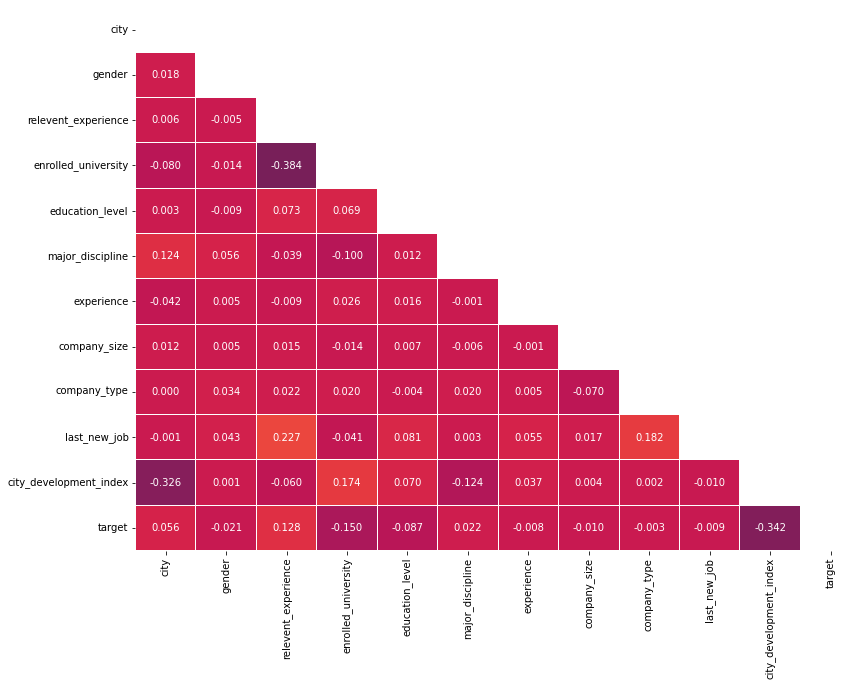

In [ ]:
# melihat correlation heatmap barangkali ada feature lain yang kurang relevan.
matrix = np.triu(final_dff.corr())
plt.figure(figsize=(13, 10))
sns.heatmap(final_dff.corr(), annot = True, fmt=".3f", mask = matrix,
            vmin = -1, vmax = 1, linewidths = 0.1, linecolor = 'white', cbar = False)
plt.show()

## <b>STAGE 3. MACHINE LEARNING MODELLING AND EVALUATION</b>

### Handling Imbalance

Pada dataset ini, nilai 0 pada kolom target
memiliki jumlah yang jauh lebih banyak
dibanding dengan nilai 1. Maka
dari itu diperlukan pemerataan agar data tidak terlalu timpang. Teknik yang diterapkan yaitu SMOTE.

In [ ]:
# Split Data Train & Test

X = final_dff.drop(['target'],1)
y = final_dff.target

X_train,X_test,y_train,y_test = tts(X,y,test_size=0.25, random_state=42)

print('Before SMOTE')
print('=====SHAPE=====')
print("X TRAIN SHAPE: ",X_train.shape)
print("X TEST SHAPE: ",X_test.shape)
print("Y TRAIN SHAPE: ",y_train.shape)
print("Y TEST SHAPE: ",y_test.shape)

# Hasil index before SMOTE
print('=====INDEX=====')
print("TRAIN:",X_train.index, "\nTEST:",X_test.index)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


Before SMOTE
=====SHAPE=====
X TRAIN SHAPE:  (14368, 11)
X TEST SHAPE:  (4790, 11)
Y TRAIN SHAPE:  (14368,)
Y TEST SHAPE:  (4790,)
=====INDEX=====
TRAIN: Int64Index([ 3063, 11518,  5665,  4909,  5610,  9800, 19125, 10194, 10186,
            11239,
            ...
            11363, 14423,  4426, 16850,  6265, 11284, 11964,  5390,   860,
            15795],
           dtype='int64', length=14368) 
TEST: Int64Index([16144, 13661,   344,  1034,  8109,  7484, 19057,  1512,  3472,
             8116,
            ...
            15632, 10505,  4903,   842,  2977,  4026, 15742,  7571,  2091,
            14817],
           dtype='int64', length=4790)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
svm_smote = SVMSMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X,y)

X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X_svm_smote,y_svm_smote, test_size=0.25, random_state=42)

print('After SMOTE')
print('=====SHAPE=====')
print("X TRAIN SHAPE: ",X_train_svm.shape)
print("X TEST SHAPE: ",X_test_svm.shape)
print("Y TRAIN SHAPE: ",y_train_svm.shape)
print("Y TEST SHAPE: ",y_test_svm.shape)

# Hasil index after SMOTE
print('=====INDEX=====')
print("TRAIN:",X_train_svm.index, "\nTEST:",X_test_svm.index)

sc = StandardScaler()
X_train_svm = sc.fit_transform(X_train_svm)
X_test_svm = sc.transform(X_test_svm)



After SMOTE
=====SHAPE=====
X TRAIN SHAPE:  (21571, 11)
X TEST SHAPE:  (7191, 11)
Y TRAIN SHAPE:  (21571,)
Y TEST SHAPE:  (7191,)
=====INDEX=====
TRAIN: Int64Index([26327,  2678, 20137, 19141, 23233, 20216, 21040, 26127,  3689,
             1676,
            ...
            16850,  6265, 22118, 11284, 11964, 21575,  5390,   860, 15795,
            23654],
           dtype='int64', length=21571) 
TEST: Int64Index([ 5799, 13912,  9212, 22978, 25197, 12160, 14307, 20222, 16068,
            15060,
            ...
             5504, 27418,   766, 22156,   803, 10670, 18524,   334, 11299,
            18500],
           dtype='int64', length=7191)


### Modelling and Evaluation

In [ ]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    errors = abs(y_pred - y_test)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    plt.figure(figsize = (5,3))
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap = 'gist_earth')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    print('Accuracy Score = ',accuracy_score(y_test, y_pred))
    print('Recall Score = ',recall_score(y_test, y_pred))
    print('Precision Score = ',precision_score(y_test, y_pred))
    print('F1 score = ', f1_score(y_test,y_pred))

    return evaluate

In [ ]:
def train_auc_roc_curve(model, X_test, y_test, X_train, y_train):
  base_fpr,base_tpr,base_threshold = roc_curve(y_train, model.predict(X_train))
  plt.plot([0,1])
  plt.plot(base_fpr,base_tpr)
  print("auc score :",auc(base_fpr,base_tpr))
  

  return train_auc_roc_curve

Algoritma model yang digunakan, yaitu:
1. LogisticRegression
2. LinearSVM
3. rbfSVM
4. KNearestNeighbors
5. RandomForestClassifier
6. DecisionTree
7. GradientBoostingClassifier
8. GaussianNB
9. EasyEnsemble



Dengan menggunakan model LogisticRegression()
Average Error: 0.2415 degrees.
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      3584
         1.0       0.55      0.23      0.33      1206

    accuracy                           0.76      4790
   macro avg       0.67      0.58      0.59      4790
weighted avg       0.72      0.76      0.72      4790

[[3353  231]
 [ 926  280]]
Accuracy Score =  0.758455114822547
Recall Score =  0.23217247097844113
Precision Score =  0.547945205479452
F1 score =  0.326150262085032


Dengan menggunakan model LinearSVC()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Average Error: 0.2430 degrees.
              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      3584
         1.0       0.54      0.22      0.31      1206

    accuracy                           0.76      4790
   macro avg       0.66      0.58      0.58      4790
weighted avg       0.72      0.76      0.72      4790

[[3364  220]
 [ 944  262]]
Accuracy Score =  0.7569937369519834
Recall Score =  0.21724709784411278
Precision Score =  0.5435684647302904
F1 score =  0.31042654028436023


Dengan menggunakan model SVC()
Average Error: 0.2326 degrees.
              precision    recall  f1-score   support

         0.0       0.81      0.91      0.85      3584
         1.0       0.56      0.35      0.43      1206

    accuracy                           0.77      4790
   macro avg       0.68      0.63      0.64      4790
weighted avg       0.74      0.77      0.75      4790

[[3251  333]
 [ 781  425]]
Accuracy Score =  0.7674321503131524
Recall Score =  0

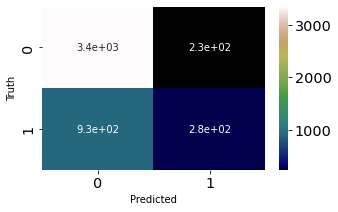

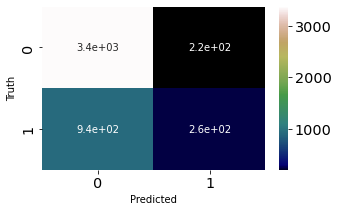

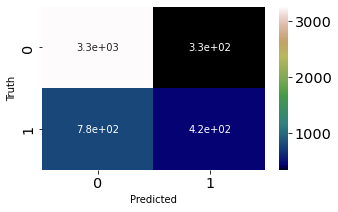

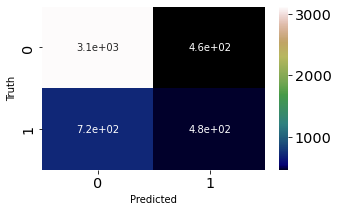

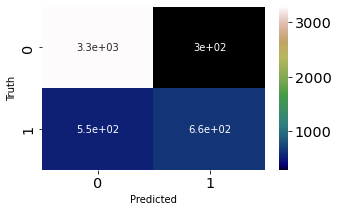

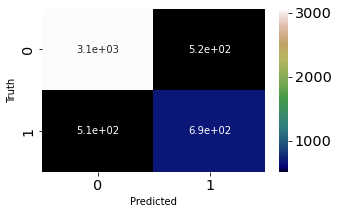

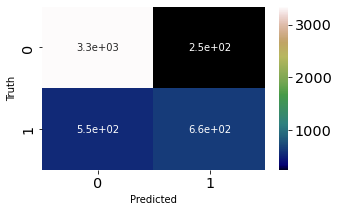

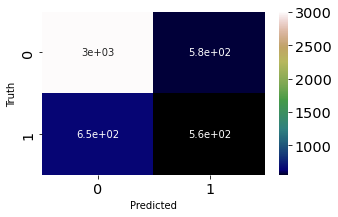

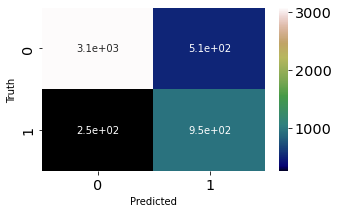

In [ ]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),
        KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),
        GaussianNB(),EasyEnsembleClassifier(base_estimator= LGBMClassifier(random_state=42), n_estimators=250, n_jobs=1, 
                                            random_state=42, verbose=0)]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB','EasyEnsemble']

for model in range(len(models)):
  print('\n\nDengan menggunakan model', models[model])
  clf=models[model]
  clf.fit(X_train,y_train)
  evaluate(clf, X_test, y_test)



Dengan menggunakan model LogisticRegression()
auc score : 0.5914314515370815


Dengan menggunakan model LinearSVC()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


auc score : 0.5886578168578155


Dengan menggunakan model SVC()
auc score : 0.6630508433078284


Dengan menggunakan model KNeighborsClassifier()
auc score : 0.7470298658678718


Dengan menggunakan model RandomForestClassifier()
auc score : 0.9667745977438011


Dengan menggunakan model DecisionTreeClassifier()
auc score : 0.9613395545040657


Dengan menggunakan model GradientBoostingClassifier()
auc score : 0.7674336609936584


Dengan menggunakan model GaussianNB()
auc score : 0.6663632126361785


Dengan menggunakan model EasyEnsembleClassifier(base_estimator=LGBMClassifier(random_state=42),
                       n_estimators=250, n_jobs=1, random_state=42)
auc score : 0.856444496040275


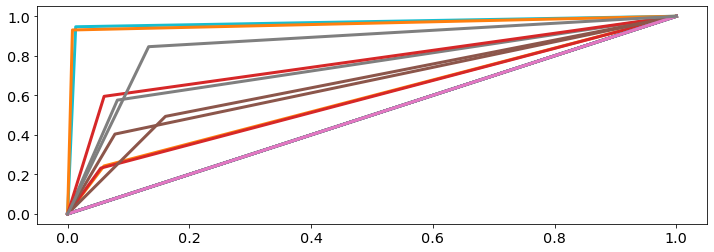

In [ ]:
for model in range(len(models)):
  print('\n\nDengan menggunakan model', models[model])
  clf=models[model]
  clf.fit(X_train,y_train)
  train_auc_roc_curve(clf, X_test, y_test, X_train, y_train)



Dengan menggunakan model LogisticRegression()
Average Error: 0.2927 degrees.
              precision    recall  f1-score   support

         0.0       0.69      0.74      0.72      3603
         1.0       0.72      0.67      0.70      3588

    accuracy                           0.71      7191
   macro avg       0.71      0.71      0.71      7191
weighted avg       0.71      0.71      0.71      7191

[[2674  929]
 [1176 2412]]
Accuracy Score =  0.7072729801140314
Recall Score =  0.6722408026755853
Precision Score =  0.7219395390601616
F1 score =  0.6962043584932891


Dengan menggunakan model LinearSVC()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Average Error: 0.2927 degrees.
              precision    recall  f1-score   support

         0.0       0.69      0.75      0.72      3603
         1.0       0.73      0.66      0.69      3588

    accuracy                           0.71      7191
   macro avg       0.71      0.71      0.71      7191
weighted avg       0.71      0.71      0.71      7191

[[2713  890]
 [1215 2373]]
Accuracy Score =  0.7072729801140314
Recall Score =  0.6613712374581939
Precision Score =  0.7272448666870978
F1 score =  0.6927455845861917


Dengan menggunakan model SVC()
Average Error: 0.2204 degrees.
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77      3603
         1.0       0.76      0.82      0.79      3588

    accuracy                           0.78      7191
   macro avg       0.78      0.78      0.78      7191
weighted avg       0.78      0.78      0.78      7191

[[2654  949]
 [ 636 2952]]
Accuracy Score =  0.7795855931024892
Recall Score =  0.8

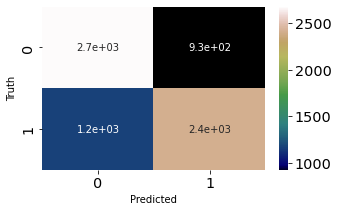

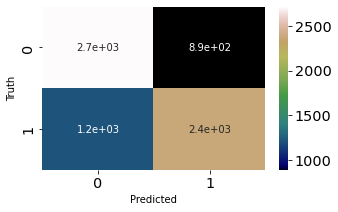

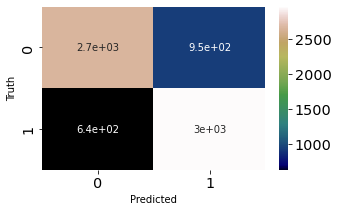

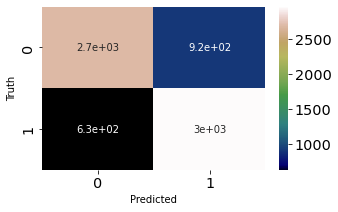

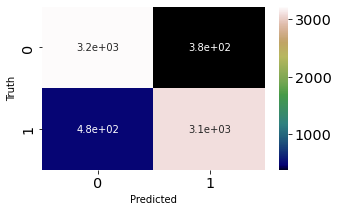

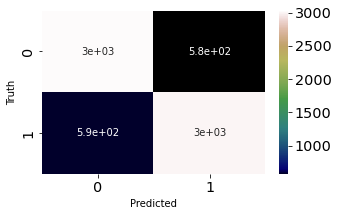

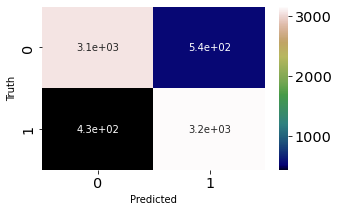

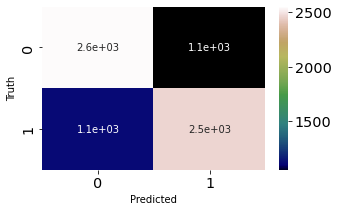

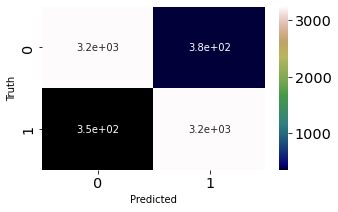

In [ ]:
for model in range(len(models)):
  print('\n\nDengan menggunakan model', models[model])
  clf=models[model]
  clf.fit(X_train_svm,y_train_svm)
  evaluate(clf, X_test_svm, y_test_svm)



Dengan menggunakan model LogisticRegression()
auc score : 0.7100530974102528


Dengan menggunakan model LinearSVC()


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1201: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


auc score : 0.7086242669089402


Dengan menggunakan model SVC()
auc score : 0.7902450579080752


Dengan menggunakan model KNeighborsClassifier()
auc score : 0.8543183895281913


Dengan menggunakan model RandomForestClassifier()
auc score : 0.9831237436166342


Dengan menggunakan model DecisionTreeClassifier()
auc score : 0.9832202646688402


Dengan menggunakan model GradientBoostingClassifier()
auc score : 0.8698159456663844


Dengan menggunakan model GaussianNB()
auc score : 0.6998369999441402


Dengan menggunakan model EasyEnsembleClassifier(base_estimator=LGBMClassifier(random_state=42),
                       n_estimators=250, n_jobs=1, random_state=42)
auc score : 0.907373793179524


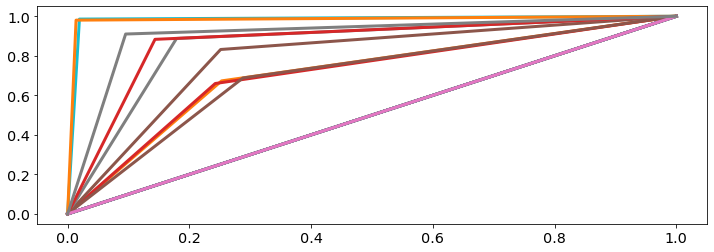

In [ ]:
for model in range(len(models)):
  print('\n\nDengan menggunakan model', models[model])
  clf=models[model]
  clf.fit(X_train_svm,y_train_svm)
  train_auc_roc_curve(clf, X_test_svm, y_test_svm, X_train_svm, y_train_svm)

### Tunning

In [ ]:
easy_lgbm = EasyEnsembleClassifier(base_estimator=LGBMClassifier(random_state=42), n_estimators=250, n_jobs=1, random_state=42, verbose = 0)

param_grid = {'replacement':[True, False], 'sampling_strategy':[float, 'auto'], 
              'warm_start':[True, False]}

from sklearn.model_selection import GridSearchCV
CV_easy_lgbm = GridSearchCV(estimator=easy_lgbm, param_grid=param_grid, cv= 5,n_jobs = 1)
CV_easy_lgbm.fit(X_train_svm,y_train_svm)

CV_easy_lgbm.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/imblearn/ensemble/_easy_ensemble.py", line 224, in fit
    return self._fit(X, y, self.max_samples, sample_weight=None)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py", line 407, in _fit
    for i in range(n_jobs)
  File "/usr/local/lib/pytho

{'replacement': True, 'sampling_strategy': 'auto', 'warm_start': True}

Dengan menggunakan model easy ensemble classifier yang telah di tuned,
Average Error: 0.1014 degrees.
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      3603
         1.0       0.90      0.90      0.90      3588

    accuracy                           0.90      7191
   macro avg       0.90      0.90      0.90      7191
weighted avg       0.90      0.90      0.90      7191

[[3235  368]
 [ 361 3227]]
Accuracy Score =  0.8986232790988736
Recall Score =  0.899386845039019
Precision Score =  0.897635605006954
F1 score =  0.8985103717109842


<function __main__.evaluate>

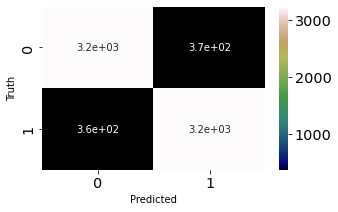

In [ ]:
tuned_easy_lgbm = EasyEnsembleClassifier(base_estimator= LGBMClassifier(random_state=42), n_estimators=250, n_jobs=1,
                       random_state=42, replacement=True,
                       sampling_strategy='auto', verbose=0,
                       warm_start=True)
print('Dengan menggunakan model easy ensemble classifier yang telah di tuned,')
tuned_easy_lgbm.fit(X_train_svm,y_train_svm)
evaluate(tuned_easy_lgbm, X_test_svm, y_test_svm)

auc score : 0.9074683155547938


<function __main__.train_auc_roc_curve>

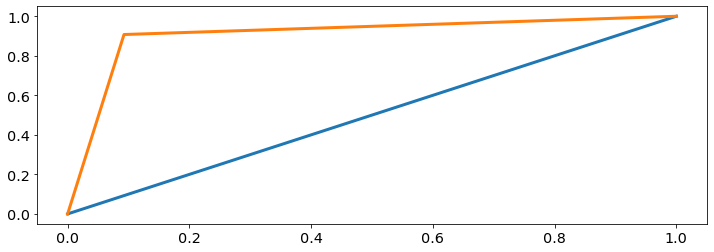

In [ ]:
train_auc_roc_curve(tuned_easy_lgbm, X_test_svm, y_test_svm, X_train_svm, y_train_svm)

Dari hasil evaluasi beberapa model, maka diperoleh model EasyEnsembleClassifier yang
memiliki nilai akurasi yang paling baik. Selanjutnya dilakukan interpretasi pada model
dengan melihat feature importance-nya

### Feature Importances

ELI5 adalah paket Python yang membantu menunjukkan kepada kita kontribusi setiap fitur dalam memprediksi output. Kita dapat menggunakan show_weight untuk menunjukan bobot yang diberikan untuk setiap fitur dalam prediksi.

In [ ]:
eli5_permutation = PermutationImportance(estimator = tuned_easy_lgbm, scoring = 'f1', random_state=42, n_iter = 5)
eli5_permutation.fit(X_test_svm, y_test_svm)

PermutationImportance(estimator=EasyEnsembleClassifier(base_estimator=LGBMClassifier(random_state=42),
                                                       n_estimators=250,
                                                       n_jobs=1,
                                                       random_state=42,
                                                       replacement=True,
                                                       warm_start=True),
                      random_state=42, scoring='f1')

In [ ]:
eli5_permutation.feature_importances_.T.reshape(-1,1)

array([[0.01115535],
       [0.11515723],
       [0.01303968],
       [0.00143247],
       [0.01600456],
       [0.00062733],
       [0.00543936],
       [0.03476489],
       [0.04706903],
       [0.0243081 ],
       [0.1059461 ]])

In [ ]:
eli5.show_weights(eli5_permutation, feature_names = X.columns.to_list())

Weight,Feature
0.1152 ± 0.0062,gender
0.1059 ± 0.0062,city_development_index
0.0471 ± 0.0045,company_type
0.0348 ± 0.0062,company_size
0.0243 ± 0.0023,last_new_job
0.0160 ± 0.0025,education_level
0.0130 ± 0.0009,relevent_experience
0.0112 ± 0.0013,city
0.0054 ± 0.0010,experience
0.0014 ± 0.0020,enrolled_university


In [ ]:
feature_importance_with_eli5=pd.DataFrame(np.hstack((np.array([X.columns[0:]]).T, eli5_permutation.feature_importances_.T.reshape(-1,1))), columns=['feature', 'importance'])
feature_importance_with_eli5['importance']=pd.to_numeric(feature_importance_with_eli5['importance'])
feature_importance_with_eli5.sort_values(by='importance', ascending=False)

,feature,importance
1,gender,0.115157
10,city_development_index,0.105946
8,company_type,0.047069
7,company_size,0.034765
9,last_new_job,0.024308
4,education_level,0.016005
2,relevent_experience,0.013040
0,city,0.011155
6,experience,0.005439
3,enrolled_university,0.001432


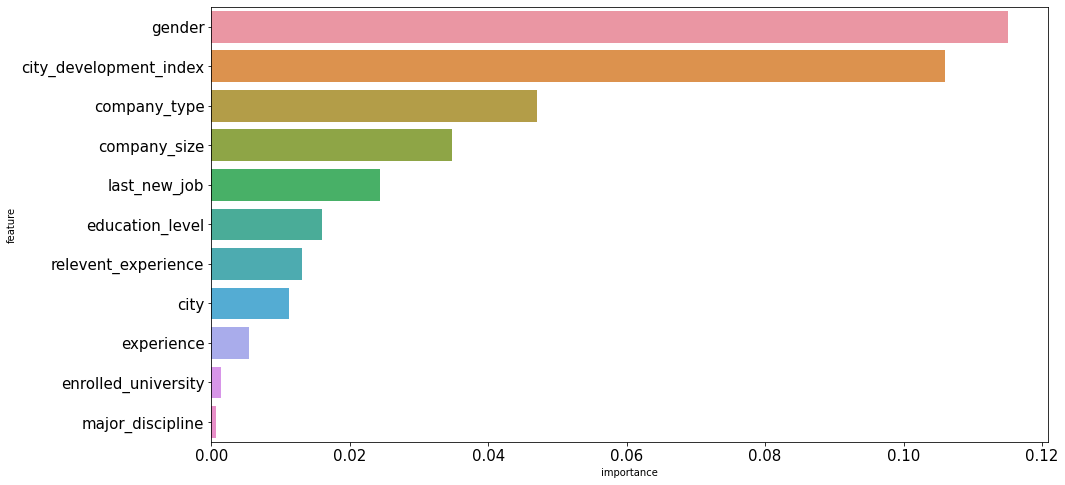

In [ ]:
plt.figure(figsize = (15,8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# We sort by importance and get the features
sns.barplot(x = 'importance', y = 'feature', data = feature_importance_with_eli5, 
            order = feature_importance_with_eli5.sort_values('importance', ascending=False).feature) 

Berdasarkan feature importance nya, kandidat dapat diseleksi berdasarkan 4 hal terpenting yaitu:
1. CDI:
kandidat yang harus dipertimbangkan berasal dari kota-kota berkembang. Hasil menunjukan bahwa target kandidat dengan CDI 0.6 lebih serius daripada kandidat dengan CDI 0.9

2. Relevant Experience:
Kandidat dengan pengalaman yang relevan lebih serius mengikuti pelatihan

3. Company Type:
Kandidat yang bekerja di perusahaan kecil (small enterprise) lebih serius mengikuti pelatihan.

4. Company Size:
Kandidat yang bekerja di perusahaan sektor Pvt Ltd lebih serius mengikuti pelatihan.